In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 28

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2800, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 2800)              120400    
                                                                 
 dropout_1 (Dropout)         (None, 2800)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2801000   
                                                                 
 dense_2 (Dense)             (None, 28)                28028     
                                                                 
Total params: 2949428 (11.25 MB)
Trainable params: 2949428 (11.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


711/711 [==============================] - ETA: 0s - loss: 0.5800 - accuracy: 0.8012
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
711/711 [==============================] - 31s 42ms/step - loss: 0.5800 - accuracy: 0.8012 - val_loss: 0.1381 - val_accuracy: 0.9787
Epoch 2/1000
  3/711 [..............................] - ETA: 29s - loss: 0.2853 - accuracy: 0.8984

C:\Users\tanta\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


711/711 [==============================] - ETA: 0s - loss: 0.2205 - accuracy: 0.9243
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
711/711 [==============================] - 30s 42ms/step - loss: 0.2205 - accuracy: 0.9243 - val_loss: 0.0942 - val_accuracy: 0.9802
Epoch 3/1000
711/711 [==============================] - ETA: 0s - loss: 0.1591 - accuracy: 0.9458
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
711/711 [==============================] - 28s 39ms/step - loss: 0.1591 - accuracy: 0.9458 - val_loss: 0.0964 - val_accuracy: 0.9701
Epoch 4/1000
711/711 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9561
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
711/711 [==============================] - 28s 39ms/step - loss: 0.1314 - accuracy: 0.9561 - val_loss: 0.0590 - val_accuracy: 0.9898
Epoch 5/1000
711/711 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

237/237 [==============================] - 2s 7ms/step - loss: 0.0452 - accuracy: 0.9844


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 129ms/step
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 5.5194390e-35 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.6699533e-36 1.0000000e+00]
27


# 混同行列

948/948 [==============================] - 4s 4ms/step


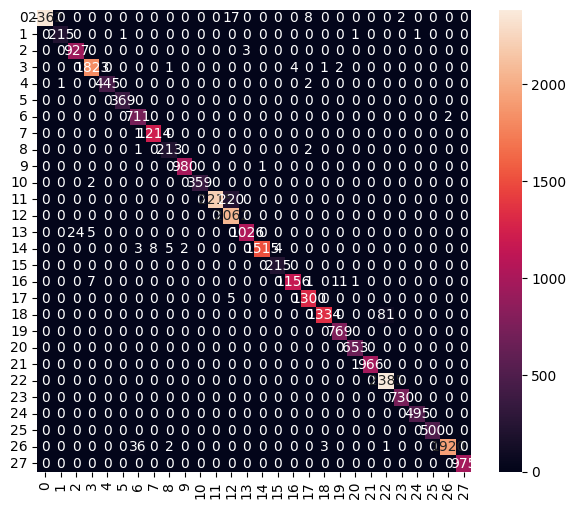

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2389
           1       1.00      0.99      0.99       218
           2       0.97      1.00      0.99       930
           3       0.99      1.00      0.99      1831
           4       1.00      0.99      1.00       448
           5       1.00      1.00      1.00       369
           6       0.95      1.00      0.97       713
           7       0.99      1.00      1.00      1215
           8       0.96      0.99      0.97       216
           9       1.00      1.00      1.00       981
          10       1.00      0.99      1.00       361
          11       1.00      0.91      0.95      2435
          12       0.89      1.00      0.94      2062
          13       1.00      0.97      0.98      1055
          14       1.00      0.99      0.99      1537
          15       0.98      1.00      0.99       215
          16       1.00      0.98      0.99      1176
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\tanta\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\tanta\AppData\Local\Temp\tmpmj1nihmg\assets


INFO:tensorflow:Assets written to: C:\Users\tanta\AppData\Local\Temp\tmpmj1nihmg\assets


2963176

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 6.3895344e-35 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.8912758e-36 1.0000000e+00]
27
